# General Social Survey (GSS) Analysis: What factors drive happiness?

&nbsp;
&nbsp;

**GSS Survey Overview:**

The GSS aims to gather data on contemporary American society in order to monitor and explain trends and constants in attitudes, behaviors, and attributes; to examine the structure and functioning of society in general as well as the role played by relevant subgroups; to compare the United States to other societies in order to place American society in comparative perspective and develop cross-national models of human society; and to make high-quality data easily accessible to scholars, students, policy makers, and others, with minimal cost and waiting.[2]

The data collected about this survey includes both demographic information and respondents' opinions on matters ranging from government spending to the state of race relations to the existence and nature of God. Because of the wide range of topics covered, and the comprehensive gathering of demographic information, survey results allow social scientists to correlate demographic factors like age, race, gender, and urban/rural upbringing with beliefs, and thereby determine whether, for example, an average middle-aged black male respondent would be more or less likely to move to a different U.S. state for economic reasons than a similarly situated white female respondent; or whether a highly educated person with a rural upbringing is more likely to believe in a transcendent God than a person with an urban upbringing and only a high-school education.

*Reference:* https://en.wikipedia.org/wiki/General_Social_Survey

&nbsp;

**GSS Data Overview:**

The General Social Surveys (GSS) have been conducted by the National Opinion Research Center (NORC) annually since 1972, except for the years 1979, 1981, and 1992 (a supplement was added in 1992), and biennially beginning in 1994. 

*Reference:* http://www.thearda.com/Archive/Files/Descriptions/GSS2014.asp

&nbsp;

**Variables Overview:**

&nbsp;

**Datasets Used:**

1. General Social Survey, 1972-2016 for assessment of General Happiness over time
2. General Social Survey, 2006-2016 for assessment of General Happiness and it's relationship with other factors

&nbsp;

**Hypothesis:**

# Analysis

&nbsp;

**General Happiness:**

Every other year for four decades, roughly a third of Americans have said they’re “very happy,” 
and about half report being “pretty happy.” Only about 10 to 15 percent typically say they’re “not too happy.


Beneath these averages are some demographic differences. For many years, researchers found that women were happier than men, although recent studies contend that the gap has narrowed or may even have been reversed. Political junkies might be interested to learn that conservative women are particularly blissful: about 40 percent say they are very happy. That makes them slightly happier than conservative men and significantly happier than liberal women. The unhappiest of all are liberal men; only about a fifth consider themselves very happy.

http://www.nytimes.com/2013/12/15/opinion/sunday/a-formula-for-happiness.html?ref=opinion&_r=1&

In [2]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings

In [3]:
#hide all warnings for specific libraries in notebook
warnings.filterwarnings("ignore")

In [4]:
#apply seaborn styleset for plotting and poster style for enhanced visualizations
sns.set_style("dark")
sns.set(color_codes=True)
sns.set_context("poster")

In [5]:
#read in data for happiness over time (1972 - 2016)
gss_happy_path_file = "../data/Happiness1972-2016.csv"
gss_happy_df = pd.read_csv(gss_happy_path_file, encoding="ISO-8859-1")
gss_happy_df.head()

FileNotFoundError: File b'../data/Happiness1972-2016.csv' does not exist

In [6]:
#read in data for subset of data (2006-2016), effectively last 10 years for snapshot analysis
gss_path_file = "../data/GSSData_2006to2016.csv"
gss_df = pd.read_csv(gss_path_file, encoding="ISO-8859-1")
gss_df.head()

FileNotFoundError: File b'../data/GSSData_2006to2016.csv' does not exist

# General Happiness over Time, Data Preparation

In [6]:
#Rename the year respondont in both dataframes for ease of using variable
gss_happy_df_renamed = gss_happy_df.rename(columns={'Gss year for this respondent                       ': 
                                                                    'Year'})
gss_df_renamed = gss_df.rename(columns={'Gss year for this respondent                       ': 
                                                                    'Year'})
gss_happy_df_renamed.head()

,General happiness,Year
0,Not too happy,1972
1,Not too happy,1972
2,Pretty happy,1972
3,Not too happy,1972
4,Pretty happy,1972


In [7]:
# Summarize Happiness data over the years ( 1972 - 2016)

#group by variables 
happiness_summary =gss_happy_df_renamed.groupby(['General happiness',
                                                 'Year'], as_index=False).size().unstack(fill_value=0).reset_index()

#drop row that is not relevant
happiness_summary = happiness_summary.drop('Data collection: General Social Survey\rCase Selection: all cases', 1)

#drop via index matching to have only remaining values with survey responses (i.e. removed not applicable)
happiness_summary = happiness_summary.drop(happiness_summary.index[[0,1,2,5]])

total = happiness_summary.apply(np.sum)
total['General happiness'] = 'total'
happiness_summary = happiness_summary.append(pd.DataFrame(total.values, index=total.keys()).T, ignore_index=True)
happiness_summary.set_index('General happiness', inplace=True)

#iteratie through each record to obtain percentage of total
for idx in happiness_summary.index:
    happiness_summary.loc[idx] = ((happiness_summary.loc[idx]/happiness_summary.loc['total']))*100
    
happiness_summary = happiness_summary.round(2)

happiness_summary.head()

Year,1972,1973,1974,1975,1976,1977,1978,1980,1982,1983,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
General happiness,,,,,,,,,,,,,,,,,,,,,
Not too happy,16.5006,13.0667,13.1081,13.064,12.5417,11.9188,9.55834,13.3379,14.5013,12.7781,...,12.1169,10.551,12.4178,13.463,13.061,15.6824,15.5468,14.1039,13.4783,15.8097
Pretty happy,53.2379,51.0667,48.9865,54.0741,53.3689,53.2417,56.0976,52.736,54.9326,56.0712,...,56.1297,57.7242,57.2681,55.1982,56.1286,54.5906,58.0677,55.7026,55.4545,55.9986
Very happy,30.2615,35.8667,37.9054,32.862,34.0894,34.8396,34.3441,33.9261,30.566,31.1507,...,31.7534,31.7249,30.3141,31.3388,30.8104,29.727,26.3855,30.1935,31.0672,28.1917
total,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [8]:
# #global plotting settings
# # plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
# plt.rcParams['font.size'] = 10
# plt.rcParams['axes.labelsize'] = 10
# plt.rcParams['axes.labelweight'] = 'bold'
# plt.rcParams['axes.titlesize'] = 10
# plt.rcParams['xtick.labelsize'] = 8
# plt.rcParams['ytick.labelsize'] = 8
# plt.rcParams['legend.fontsize'] = 10
# plt.rcParams['figure.titlesize'] = 12

# # Set an aspect ratio
# width, height = plt.figaspect(1.68)
# fig = plt.figure(figsize=(width,height), dpi=400)

# General Happiness over Time, Data Visualization

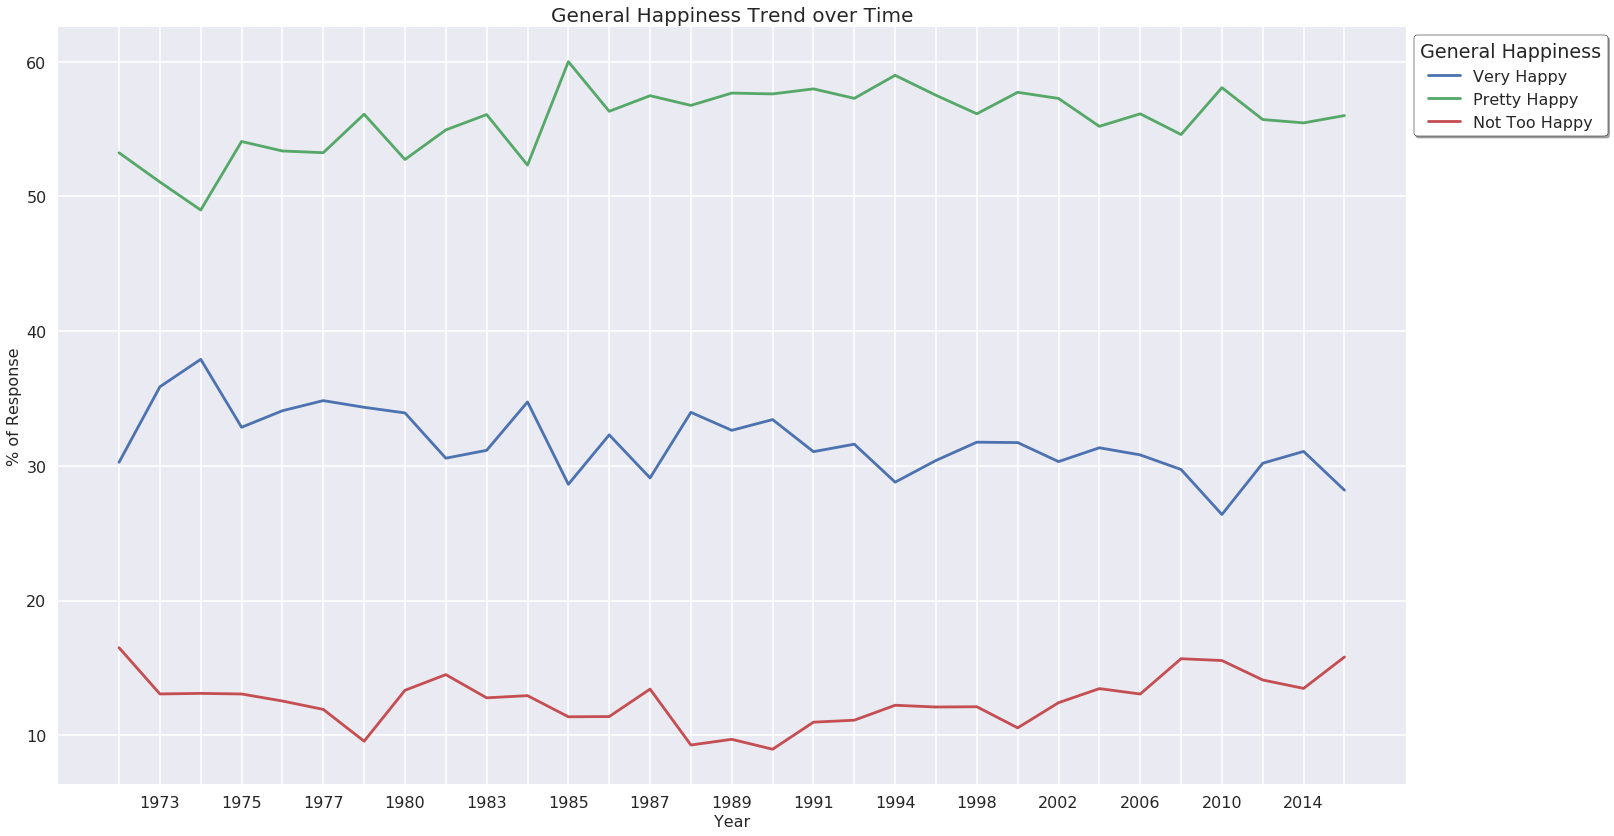

In [24]:
# Plot Data from 1972- 2016 (Happiness Measure )

#define axis lists
x_axis=list(happiness_summary)
y_axis=list(happiness_summary.loc['Very happy'])
y_axis1=list(happiness_summary.loc['Pretty happy'])
y_axis2=list(happiness_summary.loc['Not too happy'])

#figure size
plt.figure(figsize = (20,12))

#plot title
plt.title('General Happiness Trend over Time',
         fontdict = {'fontsize': 20})

# Remove the plot frame lines   
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 


#plot values
very_happy, = plt.plot(x_axis, y_axis, label="Very Happy")
pretty_happy, = plt.plot(x_axis, y_axis1, label="Pretty Happy")
not_too_happy, = plt.plot(x_axis, y_axis2, label="Not Too Happy")

#add legend
plt.legend(bbox_to_anchor = (1,1),
           frameon = True, 
           edgecolor = 'black', 
           facecolor = 'white',
           title = "General Happiness", fancybox=True, shadow=True)

#add labels
plt.xlabel('Year',
          fontdict = {'fontsize': 16})
plt.ylabel('% of Response',
          fontdict = {'fontsize': 16})


#truncate the axis
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
    plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")   
    

#tight layout
plt.tight_layout()

#save image to output folder
plt.savefig("../output/General_Happiness_Summary.png")

#show chart
plt.show()

# General Happiness vs. Condition of health, Data Preparation

In [10]:
#creating a new dataframe with selected columns
gss_happiness_health = gss_df[["Gss year for this respondent                       ",
                               "General happiness",
                               "Condition of health"]]
gss_happiness_health_renamed = gss_happiness_health.rename(columns={'Gss year for this respondent                       ': 
                                                                    'Year'})

gss_happiness_health_renamed.head()

,Year,General happiness,Condition of health
0,2006,Pretty happy,Fair
1,2006,Very happy,Not applicable
2,2006,Pretty happy,Not applicable
3,2006,Very happy,Excellent
4,2006,Pretty happy,Good


In [11]:
#group by variables
gss_happiness_grouped = gss_happiness_health_renamed.groupby(["Year", 
                                                              "General happiness",
                                                              "Condition of health"],
                                                             as_index=False).size().unstack(fill_value=0).reset_index()

#drop the rows for general happiness
gss_happiness_grouped = gss_happiness_grouped[~gss_happiness_grouped["General happiness"].isin(['No answer','Not applicable', "Don't know" ])] 

#drop the columns for condition of health, axis=1 implies that it is a column
gss_happiness_grouped = gss_happiness_grouped.drop('No answer', 1)
gss_happiness_grouped = gss_happiness_grouped.drop('Not applicable', 1)
gss_happiness_grouped = gss_happiness_grouped.drop("Don't know", 1)

#dataframe for "Pretty Happy vs Condition of Health"
gss_happiness_grouped_prettyhappy = gss_happiness_grouped.loc[gss_happiness_grouped['General happiness'] == 'Pretty happy']
gss_happiness_grouped_prettyhappy.set_index('Year', inplace=True)
gss_happiness_grouped_prettyhappy['total'] = gss_happiness_grouped_prettyhappy['Excellent'] + gss_happiness_grouped_prettyhappy['Fair'] + gss_happiness_grouped_prettyhappy['Poor'] + gss_happiness_grouped_prettyhappy['Good']
gss_happiness_grouped_prettyhappy
    
#dataframe for "Very happy vs Condition of Health"
gss_happiness_grouped_veryhappy = gss_happiness_grouped .loc[gss_happiness_grouped ['General happiness'] == 'Very happy']
gss_happiness_grouped_veryhappy.set_index('Year', inplace=True)
gss_happiness_grouped_veryhappy['total']= gss_happiness_grouped_veryhappy['Excellent'] + gss_happiness_grouped_veryhappy['Fair'] + gss_happiness_grouped_veryhappy['Poor'] + gss_happiness_grouped_veryhappy['Good']
gss_happiness_grouped_veryhappy

#dataframe for "Not too Happy vs Condition of Health"
gss_happiness_grouped_nothappy = gss_happiness_grouped .loc[gss_happiness_grouped ['General happiness'] == 'Not too happy']
gss_happiness_grouped_nothappy.set_index('Year', inplace=True)
gss_happiness_grouped_nothappy['total']= gss_happiness_grouped_nothappy['Excellent'] + gss_happiness_grouped_nothappy['Fair'] + gss_happiness_grouped_nothappy['Poor'] + gss_happiness_grouped_nothappy['Good']
gss_happiness_grouped_nothappy

Condition of health,General happiness,Excellent,Fair,Good,Poor,total
Year,,,,,,
2006,Not too happy,33,92,103,36,264
2008,Not too happy,29,77,86,32,224
2010,Not too happy,33,69,79,31,212
2012,Not too happy,23,63,62,31,179
2014,Not too happy,39,79,72,52,242
2016,Not too happy,32,111,112,58,313


# General Happiness vs. Condition of health, Data Visualization

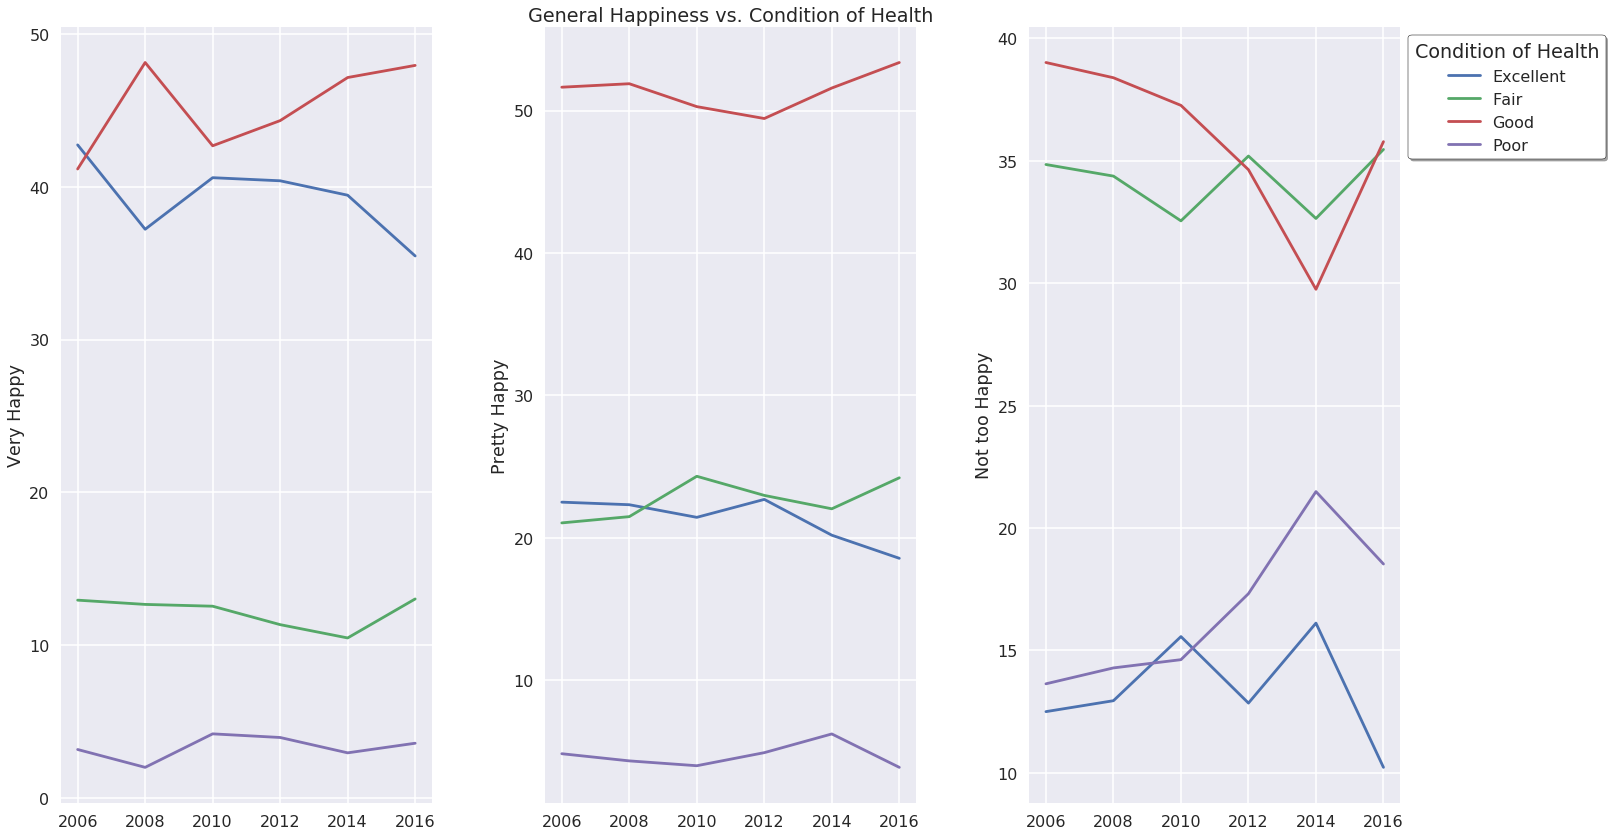

In [22]:
#very happy axis
y_axis_excellent1= (gss_happiness_grouped_veryhappy['Excellent']/gss_happiness_grouped_veryhappy['total'])*100
y_axis_fair1= (gss_happiness_grouped_veryhappy['Fair']/gss_happiness_grouped_veryhappy['total'])*100
y_axis_good1= (gss_happiness_grouped_veryhappy['Good']/gss_happiness_grouped_veryhappy['total'])*100
y_axis_poor1= (gss_happiness_grouped_veryhappy['Poor']/gss_happiness_grouped_veryhappy['total'])*100

#pretty happy axis
x_axis1 = gss_happiness_grouped_prettyhappy.index.get_values()
y_axis_excellent = (gss_happiness_grouped_prettyhappy['Excellent']/gss_happiness_grouped_prettyhappy['total'])*100
y_axis_fair = (gss_happiness_grouped_prettyhappy['Fair']/gss_happiness_grouped_prettyhappy['total'])*100
y_axis_good = (gss_happiness_grouped_prettyhappy['Good']/gss_happiness_grouped_prettyhappy['total'])*100
y_axis_poor = (gss_happiness_grouped_prettyhappy['Poor']/gss_happiness_grouped_prettyhappy['total'])*100

#not happy axis
y_axis_excellent2= (gss_happiness_grouped_nothappy['Excellent']/gss_happiness_grouped_nothappy['total'])*100
y_axis_fair2= (gss_happiness_grouped_nothappy['Fair']/gss_happiness_grouped_nothappy['total'])*100
y_axis_good2= (gss_happiness_grouped_nothappy['Good']/gss_happiness_grouped_nothappy['total'])*100
y_axis_poor2= (gss_happiness_grouped_nothappy['Poor']/gss_happiness_grouped_nothappy['total'])*100


#figure size
plt.figure(figsize = (20,12))
#tight layout
plt.tight_layout()

#very happy plot
plt.subplot(1, 3, 1)
plt.plot(x_axis1, y_axis_excellent1, label="Excellent")
plt.plot(x_axis1, y_axis_fair1, label="Fair")
plt.plot(x_axis1, y_axis_good1, label="Good")
plt.plot(x_axis1, y_axis_poor1, label="Poor")
plt.ylabel('Very Happy')

#pretty happy plot
plt.subplot(1, 3, 2)
plt.plot(x_axis1, y_axis_excellent, label="Excellent")
plt.plot(x_axis1, y_axis_fair, label="Fair")
plt.plot(x_axis1, y_axis_good, label="Good")
plt.plot(x_axis1, y_axis_poor, label="Poor")
plt.title("General Happiness vs. Condition of Health")
plt.ylabel('Pretty Happy')

#not too happy plot
plt.subplot(1, 3, 3)
plt.plot(x_axis1, y_axis_excellent2, label="Excellent")
plt.plot(x_axis1, y_axis_fair2, label="Fair")
plt.plot(x_axis1, y_axis_good2, label="Good")
plt.plot(x_axis1, y_axis_poor2, label="Poor")
plt.ylabel('Not too Happy')

#add legend
plt.legend(bbox_to_anchor = (1,1),
           frameon = True, 
           edgecolor = 'black', 
           facecolor = 'white',
           title = "Condition of Health", fancybox=True, shadow=True)

#tight layout
plt.tight_layout()

#save image to output folder
plt.savefig("../output/General_Happiness_Health.png")

#show chart
plt.show()

In [13]:


########
# x_axis1=gss_happiness_grouped_prettyhappy.index.get_values()
# y_axis_excellent= (gss_happiness_grouped_prettyhappy['Excellent']/gss_happiness_grouped_prettyhappy['total'])*100
# y_axis_fair= (gss_happiness_grouped_prettyhappy['Fair']/gss_happiness_grouped_prettyhappy['total'])*100
# y_axis_good= (gss_happiness_grouped_prettyhappy['Good']/gss_happiness_grouped_prettyhappy['total'])*100
# y_axis_poor= (gss_happiness_grouped_prettyhappy['Poor']/gss_happiness_grouped_prettyhappy['total'])*100

# y_axis_excellent=y_axis_excellent.tolist()
# y_axis_fair=y_axis_fair.tolist()
# y_axis_good=y_axis_good.tolist()
# y_axis_poor=y_axis_poor.tolist()

# excellent_health, = plt.plot(x_axis1, y_axis_excellent, color='blue', label="Excellent")
# fair_health, = plt.plot(x_axis1, y_axis_fair, color='yellow', label="Fair")
# good_health, = plt.plot(x_axis1, y_axis_good, color='green', label="Good")
# poor_health, = plt.plot(x_axis1, y_axis_poor, color='red', label="Poor")
# plt.title('Pretty Happy vs Condition of Health')

# plt.show()

# # Plotting happiness = very happy and condition of health 
# y_axis_excellent1= (gss_happiness_grouped_veryhappy['Excellent']/gss_happiness_grouped_veryhappy['total'])*100
# y_axis_fair1= (gss_happiness_grouped_veryhappy['Fair']/gss_happiness_grouped_veryhappy['total'])*100
# y_axis_good1= (gss_happiness_grouped_veryhappy['Good']/gss_happiness_grouped_veryhappy['total'])*100
# y_axis_poor1= (gss_happiness_grouped_veryhappy['Poor']/gss_happiness_grouped_veryhappy['total'])*100

# y_axis_excellent1=y_axis_excellent1.tolist()
# y_axis_fair1=y_axis_fair1.tolist()
# y_axis_good1=y_axis_good1.tolist()
# y_axis_poor1=y_axis_poor1.tolist()

# excellent_health1, = plt.plot(x_axis1, y_axis_excellent1, color='blue', label="Excellent")
# fair_health1, = plt.plot(x_axis1, y_axis_fair1, color='yellow', label="Fair")
# good_health1, = plt.plot(x_axis1, y_axis_good1, color='green', label="Good")
# poor_health1, = plt.plot(x_axis1, y_axis_poor1, color='red', label="Poor")
# plt.title('Very Happy vs Condition of Health')

# plt.show()

# # Plotting happiness = not happy and condition of health 
# y_axis_excellent2= (gss_happiness_grouped_nothappy['Excellent']/gss_happiness_grouped_nothappy['total'])*100
# y_axis_fair2= (gss_happiness_grouped_nothappy['Fair']/gss_happiness_grouped_nothappy['total'])*100
# y_axis_good2= (gss_happiness_grouped_nothappy['Good']/gss_happiness_grouped_nothappy['total'])*100
# y_axis_poor2= (gss_happiness_grouped_nothappy['Poor']/gss_happiness_grouped_nothappy['total'])*100

# y_axis_excellent2=y_axis_excellent2.tolist()
# y_axis_fair2=y_axis_fair2.tolist()
# y_axis_good2=y_axis_good2.tolist()
# y_axis_poor2=y_axis_poor2.tolist()

# excellent_health2, = plt.plot(x_axis1, y_axis_excellent2, color='blue', label="Excellent")
# fair_health2, = plt.plot(x_axis1, y_axis_fair2, color='yellow', label="Fair")
# good_health2, = plt.plot(x_axis1, y_axis_good2, color='green', label="Good")
# poor_health2, = plt.plot(x_axis1, y_axis_poor2, color='red', label="Poor")
# plt.title('Not too Happy vs Condition of Health')

# plt.figure(figsize = (8,8))

# plt.show()

# General Happiness vs. Social Issues (Marijuana), Data Preparation

In [14]:
#creating a new dataframe with selected columns
gss_happiness_social = gss_df[["Gss year for this respondent                       ",
                               "General happiness",
                               "Should marijuana be made legal"]]

#rename the year value for ease of calling in code
gss_happiness_social_renamed = gss_happiness_social.rename(columns={"Gss year for this respondent                       ": 
                                                                    "Year", 
                                                                   })
#group the values based on variables
gss_happiness_social_grouped = gss_happiness_social_renamed.groupby(["Year", 
                                                                     "General happiness",
                                                                     "Should marijuana be made legal"],as_index=False).size().unstack(fill_value=0).reset_index()

#drop the rows for general happiness
gss_happiness_social_grouped = gss_happiness_social_grouped[~gss_happiness_social_grouped["General happiness"].isin(['No answer','Not applicable', "Don't know" ])] 

#drop the columns for condition of health, axis=1 implies that it is a column
gss_happiness_social_grouped = gss_happiness_social_grouped.drop("No answer", 1)
gss_happiness_social_grouped = gss_happiness_social_grouped.drop("Not applicable", 1)
gss_happiness_social_grouped = gss_happiness_social_grouped.drop("Don't know", 1)

#dataframe for "Pretty Happy vs Social"
gss_happiness_social_grouped_prettyhappy = gss_happiness_social_grouped.loc[gss_happiness_social_grouped['General happiness'] == 'Pretty happy']
gss_happiness_social_grouped_prettyhappy.set_index('Year', inplace=True)
gss_happiness_social_grouped_prettyhappy['total'] = gss_happiness_social_grouped_prettyhappy['Legal'] + gss_happiness_social_grouped_prettyhappy['Not legal']
gss_happiness_social_grouped_prettyhappy
    
#dataframe for "Very happy vs Social"
gss_happiness_social_grouped_veryhappy = gss_happiness_social_grouped .loc[gss_happiness_social_grouped ['General happiness'] == 'Very happy']
gss_happiness_social_grouped_veryhappy.set_index('Year', inplace=True)
gss_happiness_social_grouped_veryhappy['total'] = gss_happiness_social_grouped_veryhappy['Legal'] + gss_happiness_social_grouped_veryhappy['Not legal']
gss_happiness_social_grouped_veryhappy

#dataframe for "Not too Happy vs Social"
gss_happiness_social_grouped_nothappy = gss_happiness_social_grouped .loc[gss_happiness_social_grouped ['General happiness'] == 'Not too happy']
gss_happiness_social_grouped_nothappy.set_index('Year', inplace=True)
gss_happiness_social_grouped_nothappy['total'] = gss_happiness_social_grouped_nothappy['Legal'] + gss_happiness_social_grouped_nothappy['Not legal']
gss_happiness_social_grouped_nothappy


Should marijuana be made legal,General happiness,Legal,Not legal,total
Year,,,,
2006,Not too happy,123,153,276
2008,Not too happy,87,126,213
2010,Not too happy,104,98,202
2012,Not too happy,109,91,200
2014,Not too happy,109,113,222
2016,Not too happy,215,103,318


# General Happiness vs. Social Issues (Marijuana), Data Visualization

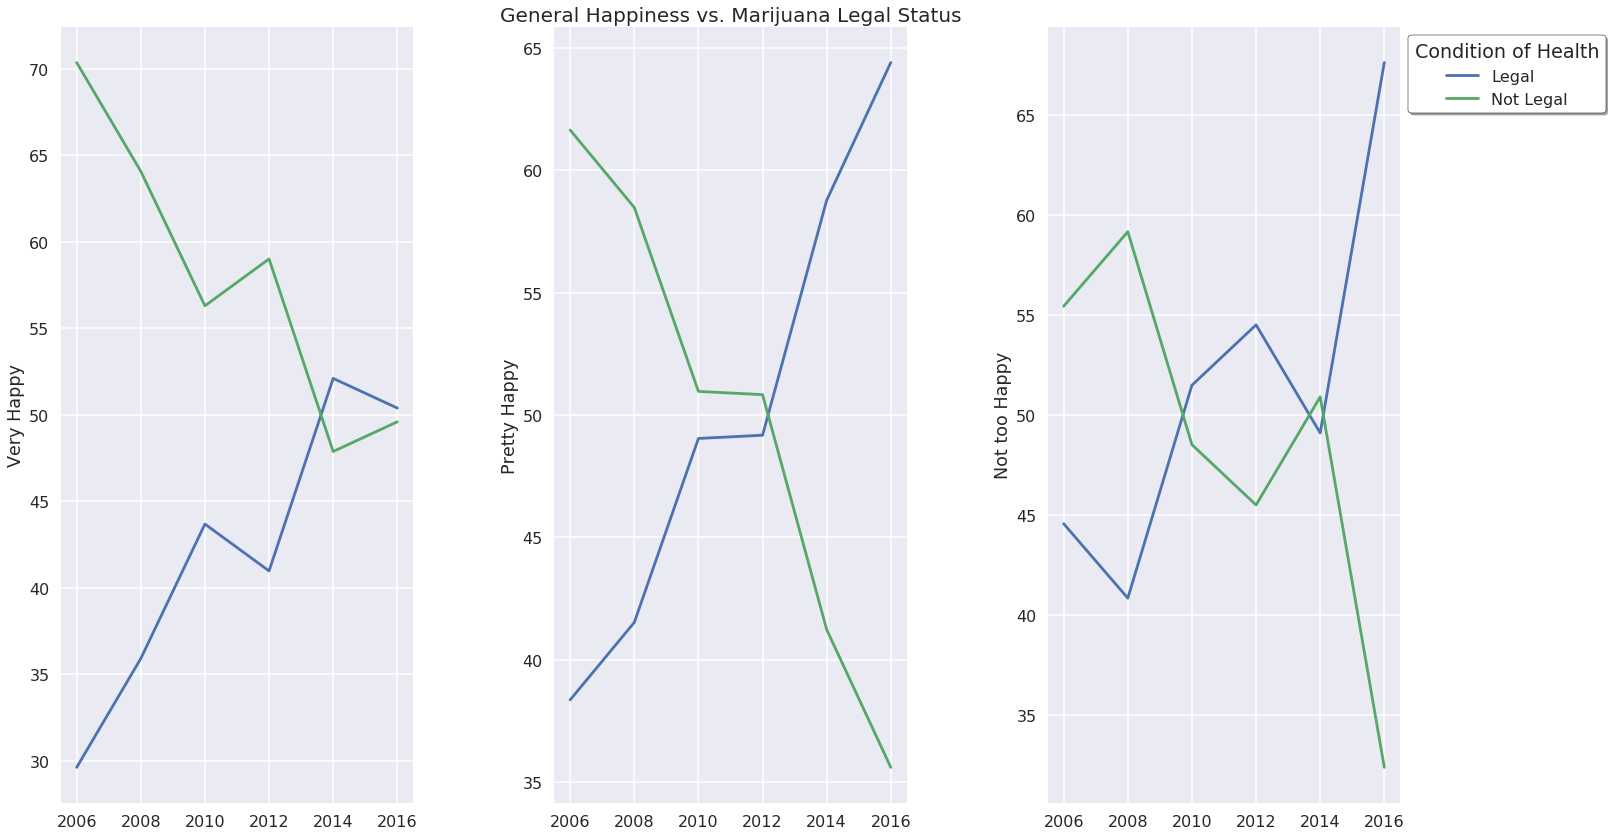

In [21]:
#very happy axis
x_axis_social = gss_happiness_social_grouped_veryhappy.index.get_values()
y_axis_legal1 = (gss_happiness_social_grouped_veryhappy['Legal']/gss_happiness_social_grouped_veryhappy['total'])*100
y_axis_not_legal1 = (gss_happiness_social_grouped_veryhappy['Not legal']/gss_happiness_social_grouped_veryhappy['total'])*100

#pretty happy axis
x_axis_social = gss_happiness_social_grouped_prettyhappy.index.get_values()
y_axis_legal = (gss_happiness_social_grouped_prettyhappy['Legal']/gss_happiness_social_grouped_prettyhappy['total'])*100
y_axis_not_legal = (gss_happiness_social_grouped_prettyhappy['Not legal']/gss_happiness_social_grouped_prettyhappy['total'])*100

#not too happy axis
y_axis_legal2 = (gss_happiness_social_grouped_nothappy['Legal']/gss_happiness_social_grouped_nothappy['total'])*100
y_axis_not_legal2 = (gss_happiness_social_grouped_nothappy['Not legal']/gss_happiness_social_grouped_nothappy['total'])*100


#figure size
plt.figure(figsize = (20,12))
#tight layout
# plt.tight_layout()

#very happy plot
plt.subplot(1, 3, 1)
plt.plot(x_axis_social, y_axis_legal1, label="Legal")
plt.plot(x_axis_social, y_axis_not_legal1, label="Not Legal")
plt.ylabel('Very Happy')

#pretty happy plot
plt.subplot(1, 3, 2)
plt.plot(x_axis_social, y_axis_legal, label="Legal")
plt.plot(x_axis_social, y_axis_not_legal, label="Not Legal")
plt.ylabel('Pretty Happy')
plt.title('General Happiness vs. Marijuana Legal Status')


#not too happy plot
plt.subplot(1, 3, 3)
plt.plot(x_axis_social, y_axis_legal2, label="Legal")
plt.plot(x_axis_social, y_axis_not_legal2,  label="Not Legal")
plt.ylabel('Not too Happy')

#legend
plt.legend(bbox_to_anchor = (1,1),
           frameon = True, 
           edgecolor = 'black', 
           facecolor = 'white',
           title = "Condition of Health", fancybox=True, shadow=True)

#tight layout
plt.tight_layout()

#save image to output folder
plt.savefig("../output/General_Happiness_Social.png")

#print charts
plt.show()

In [16]:
# # Plotting happiness = pretty happy and social

# x_axis_social = gss_happiness_social_grouped_prettyhappy.index.get_values()
# y_axis_legal = (gss_happiness_social_grouped_prettyhappy['Legal']/gss_happiness_social_grouped_prettyhappy['total'])*100
# y_axis_not_legal = (gss_happiness_social_grouped_prettyhappy['Not legal']/gss_happiness_social_grouped_prettyhappy['total'])*100

# # y_axis_legal = y_axis_legal.tolist()
# # y_axis_not_legal = y_axis_not_legal.tolist()


# legal = plt.plot(x_axis_social, y_axis_legal, color='green', label="Legal")
# not_legal = plt.plot(x_axis_social, y_axis_not_legal, color='red', label="Not Legal")
# plt.title('Pretty Happy vs. Marijuana Legal Status')

# plt.legend(bbox_to_anchor = (1,1),
#            frameon = True, 
#            edgecolor = 'black', 
#            facecolor = 'white',
#            title = "Legal Status")

# plt.suptitle('General Happiness Relationship to Marijuana Legal Status',
#          fontdict = {'fontsize': 20})

# plt.xlabel('Year of Respondent')
# plt.ylabel('Percentage of Response')


# plt.show()

# # Plotting happiness = very happy and condition of health 
# x_axis_social = gss_happiness_social_grouped_veryhappy.index.get_values()
# y_axis_legal1 = (gss_happiness_social_grouped_veryhappy['Legal']/gss_happiness_social_grouped_veryhappy['total'])*100
# y_axis_not_legal1 = (gss_happiness_social_grouped_veryhappy['Not legal']/gss_happiness_social_grouped_veryhappy['total'])*100

# # y_axis_legal1 = y_axis_legal1.tolist()
# # y_axis_not_legal1 = y_axis_not_legal1.tolist()


# legal = plt.plot(x_axis_social, y_axis_legal1, color='green', label="Legal")
# not_legal = plt.plot(x_axis_social, y_axis_not_legal1, color='red', label="Not Legal")
# plt.title('Very Happy vs. Marijuana Legal Status')

# plt.legend(bbox_to_anchor = (1,1),
#            frameon = True, 
#            edgecolor = 'black', 
#            facecolor = 'white',
#            title = "Legal Status")

# plt.xlabel('Year of Respondent')
# plt.ylabel('Percentage of Response')

# plt.show()

# # Plotting happiness = not happy and condition of health 

# y_axis_legal2 = (gss_happiness_social_grouped_nothappy['Legal']/gss_happiness_social_grouped_nothappy['total'])*100
# y_axis_not_legal2 = (gss_happiness_social_grouped_nothappy['Not legal']/gss_happiness_social_grouped_nothappy['total'])*100


# # y_axis_legal2 = y_axis_legal2.tolist()
# # y_axis_not_legal2 = y_axis_not_legal2.tolist()


# legal = plt.plot(x_axis_social, y_axis_legal2, color='green', label="Legal")
# not_legal = plt.plot(x_axis_social, y_axis_not_legal2, color='red', label="Not Legal")
# plt.title('Not too Happy vs. Marijuana Legal Status')

# plt.legend(bbox_to_anchor = (1,1),
#            frameon = True, 
#            edgecolor = 'black', 
#            facecolor = 'white',
#            title = "Legal Status")
# plt.xlabel('Year of Respondent')
# plt.ylabel('Percentage of Response')

# plt.figure(figsize = (8,8))


# plt.show()

# General Happiness vs Sex 

In [1]:
#creating a new dataframe with selected columns
gss_happiness_sex = gss_df[["Gss year for this respondent                       ",
                               "General happiness",
                               "Respondents sex"]]

#rename the year value for ease of calling in code
gss_happiness_sex_renamed = gss_happiness_sex.rename(columns={"Gss year for this respondent                       ": 
                                                                    "Year", 
                                                                   })
#group the values based on variables
gss_happiness_sex_grouped = gss_happiness_sex_renamed.groupby(["Year", 
                                                                     "General happiness",
                                                                     "Respondents sex"],as_index=False).size().unstack(fill_value=0).reset_index()

#drop the rows for general happiness
gss_happiness_sex_grouped = gss_happiness_sex_grouped[~gss_happiness_sex_grouped["General happiness"].isin(['No answer','Not applicable', "Don't know" ])] 

# #drop the columns for condition of health, axis=1 implies that it is a column
# gss_happiness_social_grouped = gss_happiness_social_grouped.drop("No answer", 1)
# gss_happiness_social_grouped = gss_happiness_social_grouped.drop("Not applicable", 1)
# gss_happiness_social_grouped = gss_happiness_social_grouped.drop("Don't know", 1)

#dataframe for "Pretty Happy vs Sex"
gss_happiness_sex_grouped_prettyhappy = gss_happiness_sex_grouped.loc[gss_happiness_sex_grouped['General happiness'] == 'Pretty happy']
gss_happiness_sex_grouped_prettyhappy.set_index('Year', inplace=True)
gss_happiness_sex_grouped_prettyhappy['total'] = gss_happiness_sex_grouped_prettyhappy['Female'] + gss_happiness_sex_grouped_prettyhappy['Male']
gss_happiness_sex_grouped_prettyhappy
    
#dataframe for "Very happy vs Social"
gss_happiness_sex_grouped_veryhappy = gss_happiness_sex_grouped .loc[gss_happiness_sex_grouped ['General happiness'] == 'Very happy']
gss_happiness_sex_grouped_veryhappy.set_index('Year', inplace=True)
gss_happiness_sex_grouped_veryhappy['total'] = gss_happiness_sex_grouped_veryhappy['Female'] + gss_happiness_sex_grouped_veryhappy['Male']
gss_happiness_sex_grouped_veryhappy

#dataframe for "Not too Happy vs Social"
gss_happiness_sex_grouped_nothappy = gss_happiness_sex_grouped .loc[gss_happiness_sex_grouped ['General happiness'] == 'Not too happy']
gss_happiness_sex_grouped_nothappy.set_index('Year', inplace=True)
gss_happiness_sex_grouped_nothappy['total'] = gss_happiness_sex_grouped_nothappy['Female'] + gss_happiness_sex_grouped_nothappy['Male']
gss_happiness_sex_grouped_nothappy



NameError: name 'gss_df' is not defined